In [2]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [3]:
X = load_digits().data
y = load_digits().target
print X.shape, y.shape

(1797L, 64L) (1797L,)


In [4]:
# Построим 10 раз решающее дерево
tree_ = DecisionTreeClassifier()
scores = cross_val_score(tree_, X, y, n_jobs=-1, cv=10)
scores.mean()

0.83420990119827709

In [5]:
# Теперь добавляем бэггинг
tree_ = DecisionTreeClassifier()
bag = BaggingClassifier(tree_, n_estimators=100)
scores = cross_val_score(bag, X, y, n_jobs=-1, cv=10)
scores.mean()

0.92712953508296325

In [6]:
# Меняем число фич на корень из их количества для каждого дерева
tree_ = DecisionTreeClassifier()
bag = BaggingClassifier( tree_, n_estimators=100, max_features=int(np.sqrt(X.shape[1])) )
scores = cross_val_score(bag, X, y, n_jobs=-1, cv=10)
scores.mean()

0.93324123638985912

In [7]:
# Теперь в каждом узле дерева выбираем случайные корень из количества фич
tree_ = DecisionTreeClassifier(max_features='sqrt')
bag = BaggingClassifier(tree_, n_estimators=100)
scores = cross_val_score(bag, X, y, n_jobs=-1, cv=10)
scores.mean()

0.95333875062685203

In [8]:
# Теперь просто запустим RandomForest 
forest = RandomForestClassifier(n_estimators=100, max_features='sqrt')
scores = cross_val_score(forest, X, y, n_jobs=-1, cv=10)
scores.mean()

0.95275492393942629

##### Видно что качество получилось очень похожим

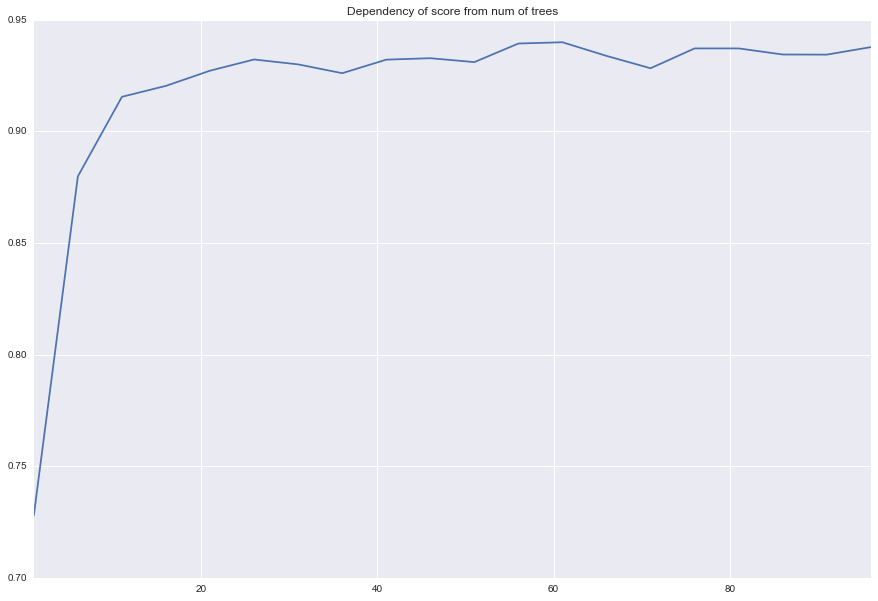

In [9]:
n_trees = np.arange(1,100,5)
scores_for_num_trees = []
for n_tree in n_trees:
    forest = RandomForestClassifier(n_estimators=n_tree, n_jobs=-1)
    scores = cross_val_score(forest, X, y, n_jobs=-1, cv=5)
    scores_for_num_trees.append(scores.mean())
pd.Series(data=scores_for_num_trees, index=n_trees).plot(title='Dependency of score from num of trees')

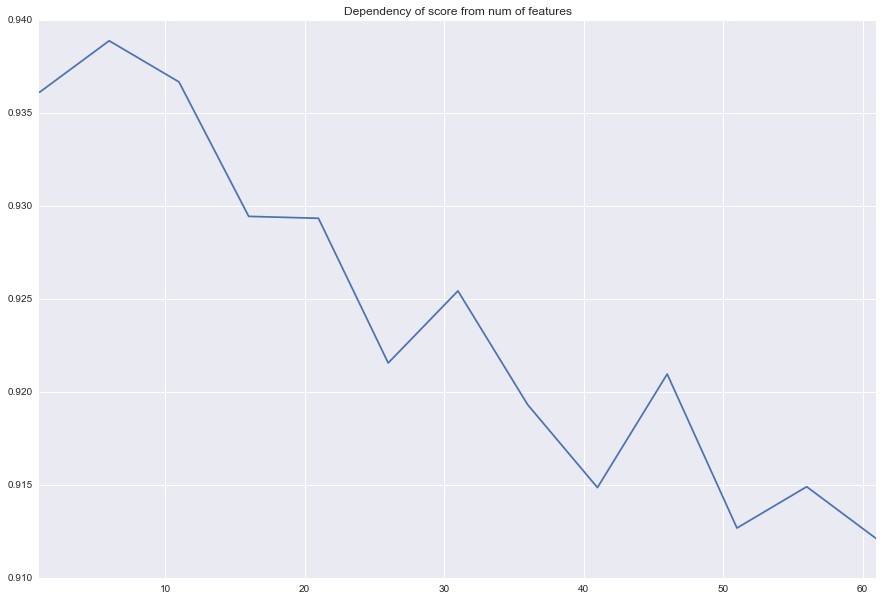

In [10]:
n_features = np.arange(1,X.shape[1],5)
scores_for_features = []
for n_feature in n_features:
    forest = RandomForestClassifier(n_estimators=50, max_features=n_feature, n_jobs=-1)
    scores = cross_val_score(forest, X, y, n_jobs=-1, cv=5)
    scores_for_features.append(scores.mean())
pd.Series(data=scores_for_features, index=n_features).plot(title='Dependency of score from num of features')

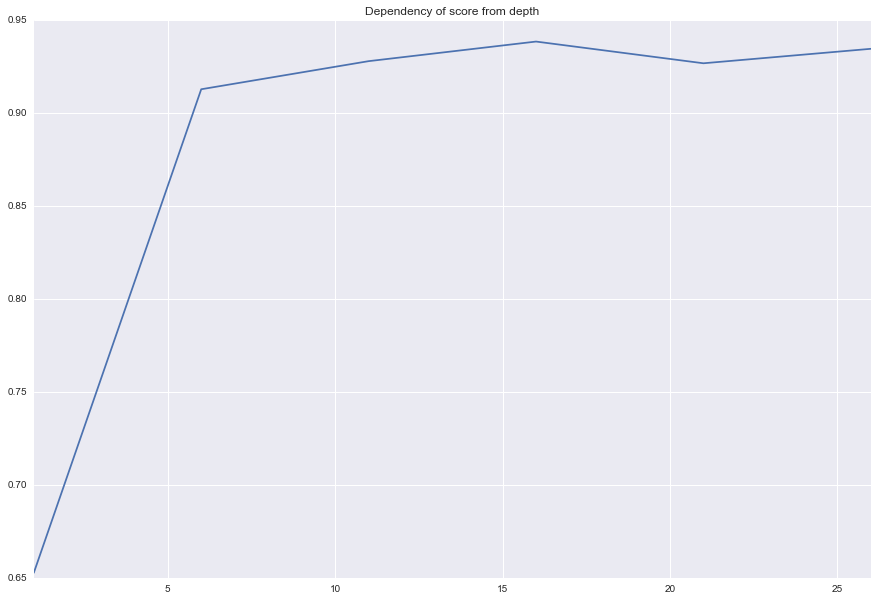

In [11]:
depths = np.arange(1,30,5)
scores_for_depths = []
for depth in depths:
    forest = RandomForestClassifier(n_estimators=50, n_jobs=-1, max_depth=depth)
    scores = cross_val_score(forest, X, y, n_jobs=-1, cv=5)
    scores_for_depths.append(scores.mean())
pd.Series(data=scores_for_depths, index=depths).plot(title='Dependency of score from depth')